In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn . linear_model import  LogisticRegression
import matplotlib.pyplot as plt
import pickle

In [2]:
df = pd.read_csv(r"C:\Users\devpu\Downloads\archive (5)\card_transdata.csv")

In [3]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [4]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [5]:
df.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [7]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [9]:
df.dropna(how = 'any', inplace = True)
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [10]:
df['fraud'].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

In [11]:
df = pd.concat([
    df[df.fraud == 1],
    df[df.fraud == 0].sample(n = 87403)
])

In [12]:
df['fraud'].value_counts()

fraud
1.0    87403
0.0    87403
Name: count, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174806 entries, 13 to 769493
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              174806 non-null  float64
 1   distance_from_last_transaction  174806 non-null  float64
 2   ratio_to_median_purchase_price  174806 non-null  float64
 3   repeat_retailer                 174806 non-null  float64
 4   used_chip                       174806 non-null  float64
 5   used_pin_number                 174806 non-null  float64
 6   online_order                    174806 non-null  float64
 7   fraud                           174806 non-null  float64
dtypes: float64(8)
memory usage: 12.0 MB


In [14]:
df['fraud']= df['fraud'].astype(int)

In [15]:
x = df.drop(['fraud'],axis = 1)
y = df ['fraud']

In [16]:
x

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
552545,52.232854,0.263538,0.490737,1.0,1.0,0.0,1.0
759715,20.919475,1.438892,0.339665,1.0,0.0,0.0,1.0
240127,8.660176,0.410856,2.238223,1.0,0.0,0.0,1.0
773286,81.762024,3.661736,1.153527,1.0,0.0,0.0,1.0


In [17]:
y

13        1
24        1
29        1
35        1
36        1
         ..
552545    0
759715    0
240127    0
773286    0
769493    0
Name: fraud, Length: 174806, dtype: int32

In [18]:
# training and test data
# splitting Tranning and Test data
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=42)


In [19]:
x_train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
419519,4.495237,5.652649,1.514684,1.0,0.0,0.0,0.0
278409,4.614378,2.515748,4.225013,1.0,1.0,0.0,1.0
623839,4.737582,1.084685,2.823574,1.0,1.0,1.0,0.0
905048,5.007452,24.491706,8.784687,1.0,0.0,0.0,1.0
937907,4.280713,0.012885,4.114876,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
709125,13.269011,0.362660,2.135744,1.0,0.0,1.0,1.0
834194,1.998096,7.798448,0.501643,1.0,0.0,0.0,1.0
395704,4.576907,0.844356,1.289094,1.0,0.0,0.0,1.0
817161,29.074116,1.466063,0.890785,1.0,0.0,0.0,1.0


In [20]:
x_test

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
287509,8.668889,0.725783,11.439120,1.0,1.0,0.0,1.0
914581,28.501728,1.629492,11.710914,1.0,0.0,0.0,1.0
199318,8.913310,0.023840,0.054445,1.0,1.0,0.0,1.0
851211,23.964911,0.298317,3.576574,1.0,0.0,0.0,0.0
272166,4.625994,3.480525,1.689900,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
659063,29.146176,0.180961,7.931539,1.0,0.0,0.0,1.0
134435,153.439453,0.603156,0.754232,1.0,0.0,0.0,1.0
765798,4.690698,9.951397,18.915655,1.0,1.0,0.0,1.0
338564,2.291099,0.069819,4.687260,1.0,0.0,0.0,1.0


In [21]:
y_train

419519    0
278409    1
623839    0
905048    1
937907    1
         ..
709125    0
834194    0
395704    0
817161    0
471312    0
Name: fraud, Length: 139844, dtype: int32

In [22]:
y_test

287509    1
914581    1
199318    0
851211    0
272166    0
         ..
659063    1
134435    1
765798    1
338564    1
100879    0
Name: fraud, Length: 34962, dtype: int32

In [23]:
y.info()

<class 'pandas.core.series.Series'>
Index: 174806 entries, 13 to 769493
Series name: fraud
Non-Null Count   Dtype
--------------   -----
174806 non-null  int32
dtypes: int32(1)
memory usage: 2.0 MB


In [24]:
zx = LogisticRegression()

In [25]:
zx.fit(x_train,y_train)

C:\Users\devpu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
tranning_data_prediction = zx.predict(x_train)

In [27]:
zx.score(x_train, y_train)*100

93.99759732273104

<function matplotlib.pyplot.show(close=None, block=None)>

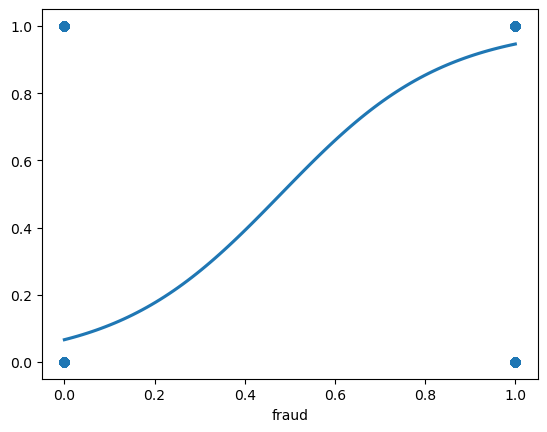

In [28]:
sns.regplot(x = y_train, y = tranning_data_prediction, logistic = True, ci = None)
plt.show

In [29]:
# test data set prediction
test_data_prediction = zx.predict(x_test)

In [30]:
# test data score
zx.score(x_train, y_train)*100

93.99759732273104

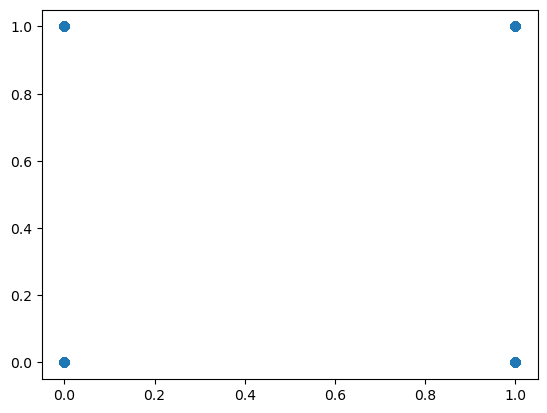

In [31]:
# Testing data prediction
plt.scatter(y_test, test_data_prediction)
plt.show()

In [32]:
print(y_test)

287509    1
914581    1
199318    0
851211    0
272166    0
         ..
659063    1
134435    1
765798    1
338564    1
100879    0
Name: fraud, Length: 34962, dtype: int32


In [34]:
line = 199318 

a = list(x_test.loc[line])
b = y_test.loc[line]

a1 = zx.predict([a])

print("List of arguements:   ",a)
print("Actual Amount:  ",b)

print("Model Prediction Amount:  ",a1)

print("Difference Between Actual and Prediction:  ", a1 - b)


List of arguements:    [8.913309639129746, 0.0238398405486638, 0.0544448251924204, 1.0, 1.0, 0.0, 1.0]
Actual Amount:   0
Model Prediction Amount:   [0]
Difference Between Actual and Prediction:   [0]


C:\Users\devpu\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [35]:
saved_model = pickle.dumps(zx)
FraudDetection_from_pickle = pickle.loads(saved_model)
FraudDetection_from_pickle.predict(x_test)

array([1, 1, 0, ..., 1, 1, 0])

In [36]:
pickle.dump(zx, open("CreditCardFraud.pkl","wb"))

In [37]:
pickle_model = pickle.load(open("CreditCardFraud.pkl","rb"))

In [38]:
y_test

287509    1
914581    1
199318    0
851211    0
272166    0
         ..
659063    1
134435    1
765798    1
338564    1
100879    0
Name: fraud, Length: 34962, dtype: int32

In [39]:
line = 134435

a = list(x_test.loc[line])
b = y_test.loc[line]

a1 = zx.predict([a])

print("List of arguements:   ",a)
print("Actual Amount:  ",b)

print("Model Prediction Amount:  ",a1)

print("Difference Between Actual and Prediction:  ", a1 - b)


List of arguements:    [153.43945320491417, 0.6031560014876154, 0.7542317997495143, 1.0, 0.0, 0.0, 1.0]
Actual Amount:   1
Model Prediction Amount:   [1]
Difference Between Actual and Prediction:   [0]


C:\Users\devpu\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
